<a href="https://colab.research.google.com/github/mayankshouche/DSLabFinalProject/blob/main/EDA_and_Topic_Modeling_of_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Columns to add:

1. Try LDA Get the topics of the model
<!-- 2. Get the sentiment of the text and add that as a feature -->
3. add important bigrams as columns, e.g. 'trump administration'
<!-- 6. possibly hashtag -->
7. Look at tweet @ after certain date to see if joebiden gets retweeted, if topics changed a lot after certain dates\
8. Number the text.contains()/is_topic so that we can one-hot-encode them

process_input():
- add the respective features
- apply the preprocessing methods used in training

5. Use XGBoost/Training on Top of BERT





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

X_train = pd.read_csv("/content/drive/MyDrive/460J Final Project/X_train.csv.zip")
X_val = pd.read_csv("/content/drive/MyDrive/460J Final Project/X_val.csv.zip")
y_train = pd.read_csv("/content/drive/MyDrive/460J Final Project/y_train.csv.zip")
y_val = pd.read_csv("/content/drive/MyDrive/460J Final Project/y_val.csv.zip")


In [3]:
# y_val["party"].value_counts()
len(y_val)+len(y_train)

595250

In [4]:
X_train.head()

,Unnamed: 0,Unnamed: 0.1,id,screen_name,user_id,time,link,text,source
0,533000,3032,1318299678727938048,SenateGOP,14344823,2020-10-19T17:15:10-04:00,https://www.twitter.com/SenateGOP/statuses/131...,✓ Help for schools\n \n✓ Another round of PPP\...,Twitter Media Studio
1,299986,938,1269804019364618240,RepTedDeutch,137794015,2020-06-07T21:30:44-04:00,https://www.twitter.com/RepTedDeutch/statuses/...,George Floyd\nAhmaud Arbery\nBreonna Taylor\n\...,Twitter for iPhone
2,28058,2475,1219714673676836864,SenateDems,73238146,2020-01-21T15:13:34-05:00,https://www.twitter.com/SenatorCarper/statuses...,RT @SenatorCarper I support @SenSchumer's effo...,TweetDeck
3,456505,1308,1301945685315670016,RepSarbanes,364415553,2020-09-04T14:10:15-04:00,https://www.twitter.com/RepSarbanes/statuses/1...,For individuals living with opioid addiction a...,Twitter Web App
4,390712,2467,1287879573724520448,RepMarciaFudge,153486399,2020-07-27T18:36:32-04:00,https://www.twitter.com/RepMarciaFudge/statuse...,"Tomorrow, I will chair a Subcommittee on Elect...",Twitter Web App


In [5]:
train = [X_train, y_train['party']]
dataset = pd.concat(train, axis=1)
dataset.head()

,Unnamed: 0,Unnamed: 0.1,id,screen_name,user_id,time,link,text,source,party
0,533000,3032,1318299678727938048,SenateGOP,14344823,2020-10-19T17:15:10-04:00,https://www.twitter.com/SenateGOP/statuses/131...,✓ Help for schools\n \n✓ Another round of PPP\...,Twitter Media Studio,R
1,299986,938,1269804019364618240,RepTedDeutch,137794015,2020-06-07T21:30:44-04:00,https://www.twitter.com/RepTedDeutch/statuses/...,George Floyd\nAhmaud Arbery\nBreonna Taylor\n\...,Twitter for iPhone,D
2,28058,2475,1219714673676836864,SenateDems,73238146,2020-01-21T15:13:34-05:00,https://www.twitter.com/SenatorCarper/statuses...,RT @SenatorCarper I support @SenSchumer's effo...,TweetDeck,D
3,456505,1308,1301945685315670016,RepSarbanes,364415553,2020-09-04T14:10:15-04:00,https://www.twitter.com/RepSarbanes/statuses/1...,For individuals living with opioid addiction a...,Twitter Web App,D
4,390712,2467,1287879573724520448,RepMarciaFudge,153486399,2020-07-27T18:36:32-04:00,https://www.twitter.com/RepMarciaFudge/statuse...,"Tomorrow, I will chair a Subcommittee on Elect...",Twitter Web App,D


# Basic Preprocessing

In [8]:
#!pip install tweet-preprocessor
import preprocessor as p
import re 

In [9]:
def preprocess_tweet(tweet):
  # tweet = tweet['text']
  clean_tweet = tweet.replace('@', '')
  clean_tweet = clean_tweet.replace('#', '')
  clean_tweet = clean_tweet.replace('&', '')
  clean_tweet = re.sub(r'[^A-Za-z0-9.!, ]+', '', clean_tweet)
  return clean_tweet


dataset["clean_text"] = dataset['text'].apply(lambda x: preprocess_tweet(x))
dataset.head()

,Unnamed: 0,Unnamed: 0.1,id,screen_name,user_id,time,link,text,source,party,clean_text
0,533000,3032,1318299678727938048,SenateGOP,14344823,2020-10-19T17:15:10-04:00,https://www.twitter.com/SenateGOP/statuses/131...,✓ Help for schools\n \n✓ Another round of PPP\...,Twitter Media Studio,R,Help for schools Another round of PPP Unemp...
1,299986,938,1269804019364618240,RepTedDeutch,137794015,2020-06-07T21:30:44-04:00,https://www.twitter.com/RepTedDeutch/statuses/...,George Floyd\nAhmaud Arbery\nBreonna Taylor\n\...,Twitter for iPhone,D,George FloydAhmaud ArberyBreonna TaylorFor the...
2,28058,2475,1219714673676836864,SenateDems,73238146,2020-01-21T15:13:34-05:00,https://www.twitter.com/SenatorCarper/statuses...,RT @SenatorCarper I support @SenSchumer's effo...,TweetDeck,D,RT SenatorCarper I support SenSchumers effort ...
3,456505,1308,1301945685315670016,RepSarbanes,364415553,2020-09-04T14:10:15-04:00,https://www.twitter.com/RepSarbanes/statuses/1...,For individuals living with opioid addiction a...,Twitter Web App,D,For individuals living with opioid addiction a...
4,390712,2467,1287879573724520448,RepMarciaFudge,153486399,2020-07-27T18:36:32-04:00,https://www.twitter.com/RepMarciaFudge/statuse...,"Tomorrow, I will chair a Subcommittee on Elect...",Twitter Web App,D,"Tomorrow, I will chair a Subcommittee on Elect..."


In [11]:
import preprocessor as p
count = 20
for i,row in dataset.iterrows():
  if count == 0:
    break
  count -=1
  processed_tweet = p.parse(row["text"])
  if processed_tweet.hashtags == None:
    continue
  print((processed_tweet.hashtags[0].match))



#BlackLivesMatter
#coronavirus
#COVID19
#COVID19
#CARESAct
#HumanTrafficking
#GOP
#COVID19


In [12]:
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud,STOPWORDS

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def wordcloud_draw(data, color='white'):
    def covid(string):
      if 'covid' in string or 'corona' in string:
        return 'Covid19'
      if 'blacklives' in string or 'lives matter' in string or 'blm' in string:
        return 'BLM'
      return string
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                                and word != 'amp'
                                and word != 'QT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
  

def wordcloud_hashtags(data, color='black'):
    def covid(string):
      if 'covid' in string or 'corona' in string:
        return 'Covid19'
      return string
    words = ' '.join(data)
    processed_tweet = p.parse(words)
    # print(processed_tweet.hashtags)
    # if processed_tweet.hashtags == None:

    cleaned_word = " ".join([word.match for word in processed_tweet.hashtags
                            if word and 'http' not in word.match
                                and word.match != 'RT'
                                and word.match != 'amp'
                                and word.match != 'QT'
                            ])
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show() 


def wordcloud_mentions(data, color='blue'):
    def covid(string):
      if 'covid' in string or 'corona' in string:
        return 'Covid19'
      return string




    words = ' '.join(data)
    processed_tweet = p.parse(words)
    # print(processed_tweet.hashtags)
    # if processed_tweet.hashtags == None:

    cleaned_word = " ".join([word.match for word in processed_tweet.mentions
                            if word and 'http' not in word.match
                                and word.match != 'RT'
                                and word.match != 'amp'
                                and word.match != 'QT'
                            ])
    
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show() 


# Analysis of Democratic Party Tweets

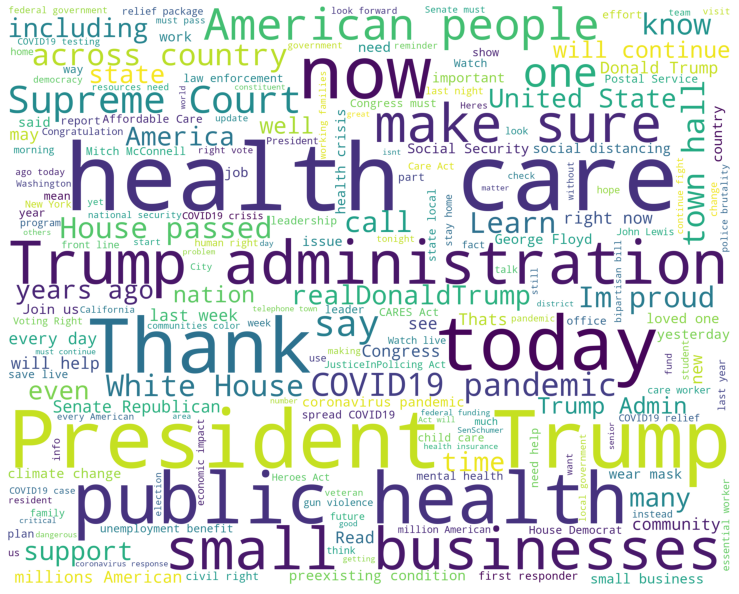

In [14]:
democrat = dataset[dataset["party"] == 'D']
wordcloud_draw(democrat["clean_text"])

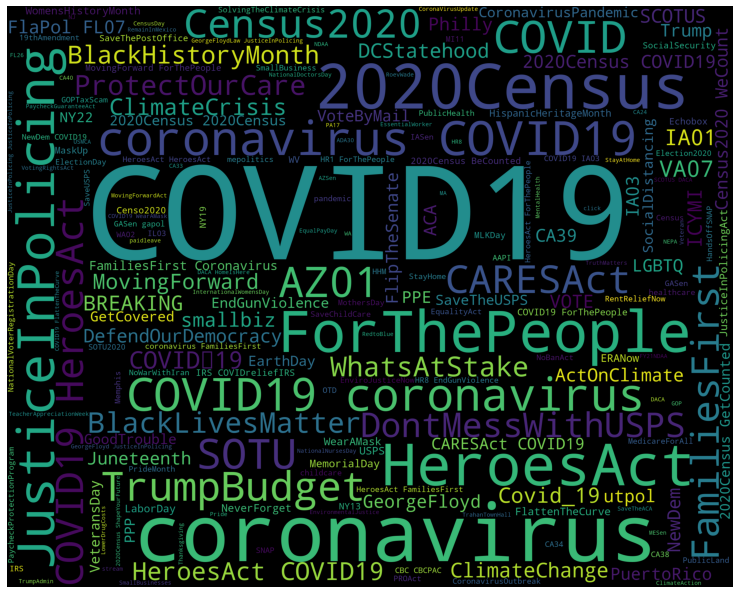

In [15]:
# democrat = dataset[dataset["party"] == 'D']
wordcloud_hashtags(democrat["text"])

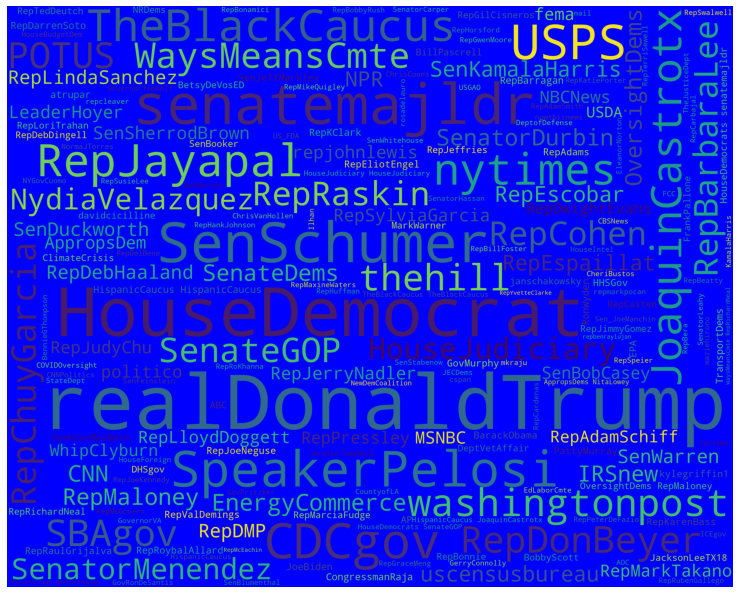

In [16]:
wordcloud_mentions(democrat["text"])

# Analysis of Republican Party Tweets

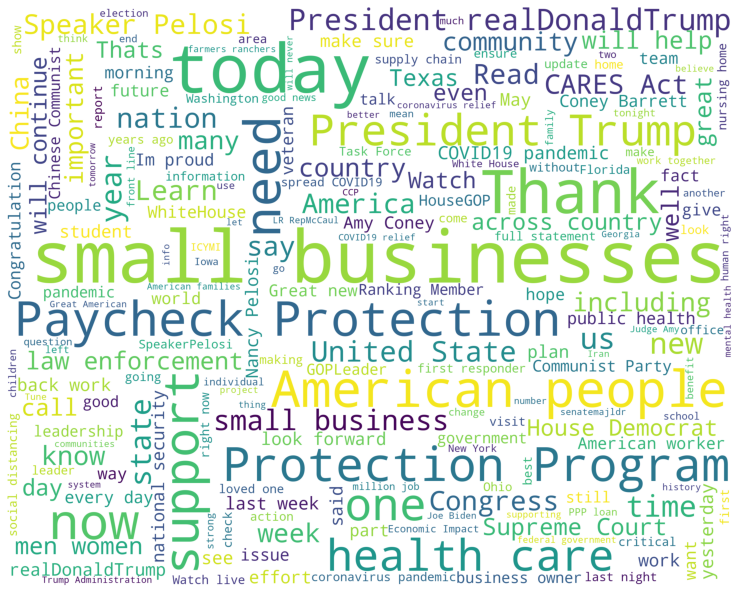

In [17]:
republican = dataset[dataset["party"] == 'R']
wordcloud_draw(republican["clean_text"])

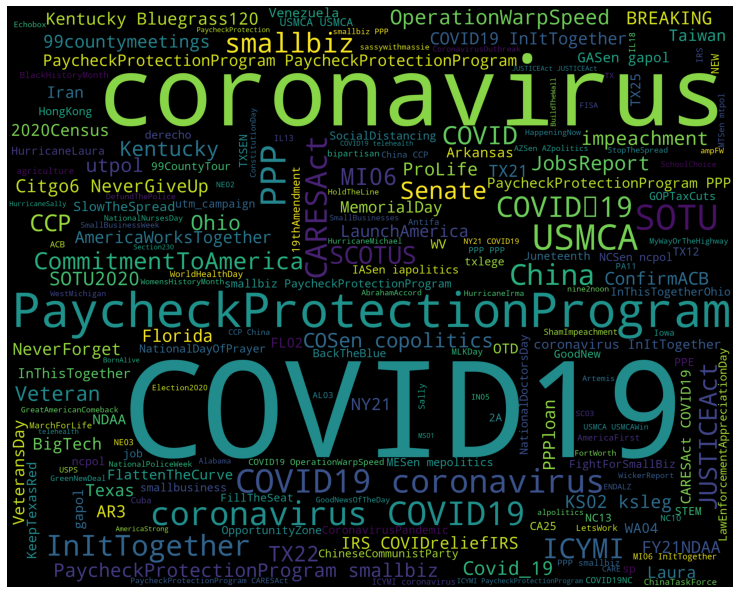

In [18]:
wordcloud_hashtags(republican["text"])

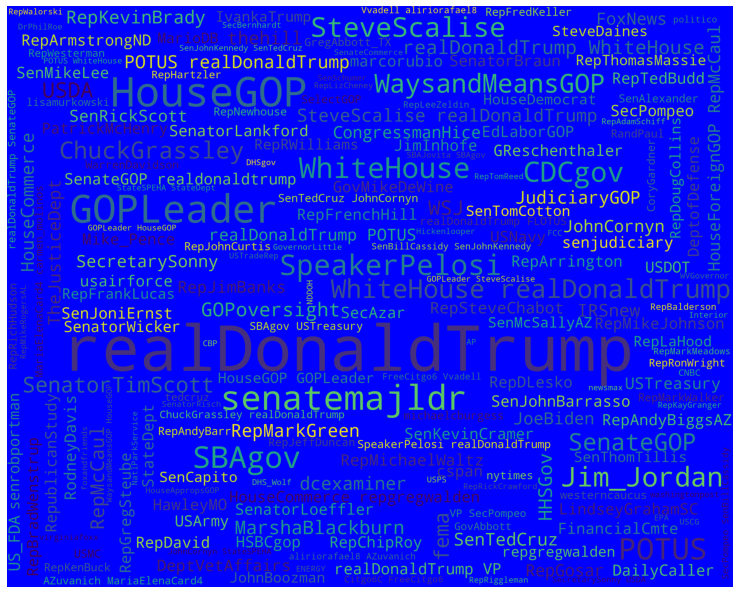

In [19]:
wordcloud_mentions(republican["text"])

# LDA of Republican Tweets

In [22]:
#!pip install pyLDAvis
import nltk; nltk.download('stopwords')
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


     |████████████████████████████████| 1.6MB 10.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=805248092a65506fcf90360194dd7e0942e3161d43108e8d67ccb566c7e3e248
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation

stop_words = stopwords.words('english')


def get_n_grams(clean_text):
    #stop_words = stopwords.words('english')
    tokenized_text = [re.sub(r'[^A-Za-z0-9]+-', '', word.lower()) for word in clean_text.split() if word not in set(stop_words) and 'http' not in word and 'jpg' not in word and 'www' not in word and word.lower()!='rt' and word.lower()!='amp']
    for i in range(len(tokenized_text)):
      if 'covid' in tokenized_text[i] or 'corona' in tokenized_text[i]:
        tokenized_text[i] = 'Covid'
      elif 'biden' in tokenized_text[i] or 'joe' in tokenized_text[i]:
        tokenized_text[i] = 'JoeBiden'
      elif 'pelosi' in tokenized_text[i] or 'nancy' in tokenized_text[i]:
        tokenized_text[i] = 'NancyPelosi'     
      elif 'twitter' in  tokenized_text[i]:
        tokenized_text[i]=''
      return ' '.join(tokenized_text)
    # allowed_postags=set(['NOUN', 'ADJ', 'VERB', 'ADV'])
    # doc = nlp(" ".join(tokenized_text)) 
    # return [token.lemma_ for token in doc if token.pos_ in allowed_postags]
    # print(final)

republican["cleaner_text"] = republican["clean_text"].apply(lambda x: get_n_grams(x))



def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

# dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
# documents = dataset.data

# documents


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
documents = [i for i in republican["cleaner_text"].values.tolist() if i]

no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, min_df=1000, max_features=no_features, stop_words='english', ngram_range=(1,3))
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
tfidf_feature_names


In [ ]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.85, max_features=no_features, stop_words='english', ngram_range=(1,3))
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names

In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation


no_topics = 10

# Run NMF

nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

print("Done NMF")


# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0, n_jobs=4).fit(tf)

print('Done')
# display_topics(nmf, tfidf_feature_names, no_top_words)
# print('here')
# display_topics(lda, tf_feature_names, no_top_words)
# no_top_words = 20

# display_topics(nmf, tfidf_feature_names, no_top_words)
# print()
# display_topics(lda, tf_feature_names, no_top_words)

In [31]:
no_top_words = 20

display_topics(nmf, tfidf_feature_names, no_top_words)
print()
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
covid19 coronavirus help information pandemic spread testing need response cdcgov learn covid19 pandemic state visit resources relief federal china vaccine qt
Topic 1:
small businesses small businesses program protection paycheck paycheck protection protection program paycheck protection program ppp business paycheckprotectionprogram loans small business employees workers loan apply sbagov funding
Topic 2:
house democrats senate vote impeachment pelosi house democrats republicans qt speaker time congress voting americans partisan dems passed election speaker pelosi gopleader
Topic 3:
today thank day great happy qt honor service years women country nation work national men men women birthday family time proud
Topic 4:
realdonaldtrump president president realdonaldtrump trump whitehouse president trump qt johncornyn america administration signed sotu potus usmca historic peace trade trumps americans impeachment
Topic 5:
american people american people economy work china jobs wor

In [ ]:
tf_vectorizer = CountVectorizer(max_df=0.85, max_features=no_features, stop_words='english', ngram_range=(2,2))
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names


In [92]:
num_topics = 10
num_top_words = 20
lda = LatentDirichletAllocation(n_components=num_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0, n_jobs=4).fit(tf)
display_topics(lda, tf_feature_names, num_top_words)

Topic 0:
small businesses health care small business im proud social distancing business owners white house million jobs american families help small ppp loans coronavirus outbreak additional funding north carolina families small qt housegop care providers proud support forward working impacted covid19
Topic 1:
united states covid19 pandemic great news mental health federal government slow spread big tech president realdonaldtrumps health safety healthcare workers safe effective covid19 outbreak covid19 crisis combat coronavirus million americans today day combat covid19 fight coronavirus warp speed operation warp
Topic 2:
cares act spread covid19 economic impact great american new york god bless im glad police officers workers families care workers new jobs public lands sen rubio impact payment play politics trade agreement act help coronavirus crisis postal service american outdoors
Topic 3:
supreme court amy coney nancy pelosi coney barrett watch live judge amy stay home judge barre

In [119]:
lda_output = lda.transform(tf)

In [121]:
# column names
topicnames = ['Topic' + str(i) for i in range(lda.n_components)]
# index names
docnames = ['Doc' + str(i) for i in range(len(documents))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 3), columns=topicnames, index=docnames)

In [128]:
dominant_topic = my_argmax(df_document_topic.values)
return dominant_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.025,0.025,0.025,0.025,0.025,0.025,0.775,0.025,0.025,0.025,6
Doc1,0.020,0.020,0.820,0.020,0.020,0.020,0.020,0.020,0.020,0.020,2
Doc2,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.775,9
Doc3,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0
Doc4,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0
Doc5,0.014,0.014,0.014,0.014,0.014,0.014,0.014,0.871,0.014,0.014,7


In [110]:
def my_argmax(a):
    rows = np.where(a == a.max(axis=1)[:, None])[0]
    rows_multiple_max = rows[:-1][rows[:-1] == rows[1:]]
    my_argmax = a.argmax(axis=1)
    my_argmax[rows_multiple_max] = -1
    return my_argmax

# Summary of above into one function

- topic model per sentence
- input: cleaner_text data
- output: array of topic numbers, 0-9, -1 means not part of top 10 topics/not influenced by 

In [ ]:
def my_argmax(a):
    rows = np.where(a == a.max(axis=1)[:, None])[0]
    rows_multiple_max = rows[:-1][rows[:-1] == rows[1:]]
    my_argmax = a.argmax(axis=1)
    my_argmax[rows_multiple_max] = -1
    return my_argmax

def LDAFeatureSelect(data):
  num_topics = 10
  num_top_words = 20
  tf_vectorizer = CountVectorizer(max_df=0.85, max_features=no_features, stop_words='english', ngram_range=(1,3))
  tf = tf_vectorizer.fit_transform(data)
  #tf_feature_names = tf_vectorizer.get_feature_names()
  #print(tf_feature_names)
  lda = LatentDirichletAllocation(n_components=num_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0, n_jobs=4).fit(tf)
  #display_topics(lda, tf_feature_names, num_top_words)
  
  lda_output = lda.transform(tf)
  # column names
  topicnames = ['Topic' + str(i) for i in range(lda.n_components)]
  # index names
  docnames = ['Doc' + str(i) for i in range(len(data))]
  # Make the pandas dataframe
  df_document_topic = pd.DataFrame(np.round(lda_output, 3), columns=topicnames, index=docnames)

  dominant_topic = my_argmax(df_document_topic.values)
  return dominant_topic, lda, tf_vectorizer

# Column Creation

In [ ]:
def my_argmax(a):
    rows = np.where(a == a.max(axis=1)[:, None])[0]
    rows_multiple_max = rows[:-1][rows[:-1] == rows[1:]]
    my_argmax = a.argmax(axis=1)
    my_argmax[rows_multiple_max] = -1
    return my_argmax

def LDAColumnMaker(new_data, tf_vectorizer, lda):
  tf_vectorizer.transform(new_data)
  lda_output = lda.transform(tf)
  # column names
  topicnames = ['Topic' + str(i) for i in range(lda.n_components)]
  # index names
  docnames = ['Doc' + str(i) for i in range(len(new_data))]
  # Make the pandas dataframe
  df_document_topic = pd.DataFrame(np.round(lda_output, 3), columns=topicnames, index=docnames)

  dominant_topic = my_argmax(df_document_topic.values)
  return dominant_topic

# NLTK Pretrained Sentiment Analysis Model

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# data should be vector of texts. change to text in data["text"] if data is full pd.
def sentimentAnalyzer(data):
  sid = SentimentIntensityAnalyzer()
  sentiment = []
  for text in data:
    test = sid.polarity_scores(text)
    result = test['compound']
    sentiment.append(result)
  return sentiment

# Flair Pretrained Sentiment Analysis Model

In [ ]:
#!pip3 install flair
import flair

def sentimentAnalyzer2(data):
  flair_sentiment = flair.models.TextClassifier.load('en-sentiment')
  sentiment = []
  for text in data:
    s = flair.data.Sentence(text)
    flair_sentiment.predict(s)
    result = s.labels[0].to_dict()
    value = result['confidence']
    if result['value'] == 'NEGATIVE':
      value = -value
    sentiment.append(value)

  return sentiment

# LDA of Democratic Tweets

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation

def get_n_grams(clean_text):
    tokenized_text = [re.sub(r'[^A-Za-z0-9]+-', '', word.lower()) for word in clean_text.split() if word not in set(stop_words) and 'http' not in word and 'jpg' not in word and 'www' not in word and word.lower()!='rt' and word.lower()!='amp']
    for i in range(len(tokenized_text)):
      if 'covid' in tokenized_text[i] or 'corona' in tokenized_text[i]:
        tokenized_text[i] = 'Covid'
      elif 'biden' in tokenized_text[i] or 'joe' in tokenized_text[i]:
        tokenized_text[i] = 'JoeBiden'
      elif 'pelosi' in tokenized_text[i] or 'nancy' in tokenized_text[i]:
        tokenized_text[i] = 'NancyPelosi'     
      elif 'twitter' in  tokenized_text[i]:
        tokenized_text[i]=''
      return ' '.join(tokenized_text)
    # allowed_postags=set(['NOUN', 'ADJ', 'VERB', 'ADV'])
    # doc = nlp(" ".join(tokenized_text)) 
    # return [token.lemma_ for token in doc if token.pos_ in allowed_postags]
    # print(final)

democrat["cleaner_text"] = democrat["clean_text"].apply(lambda x: get_n_grams(x))


def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

# dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
# documents = dataset.data

# documents


NameError: ignored

In [ ]:

documents = [i for i in republican["cleaner_text"].values.tolist() if i ]

no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=1000, max_features=no_features, stop_words='english', ngram_range=(1,4))
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
tfidf_feature_names

In [ ]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.85, max_features=no_features, stop_words='english', ngram_range=(1,3))
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()
tf_feature_names

In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation


no_topics = 10

# Run NMF

nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

print("Done NMF")


# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0, n_jobs=4).fit(tf)
print('Done')
# display_topics(nmf, tfidf_feature_names, no_top_words)
# print('here')
# display_topics(lda, tf_feature_names, no_top_words)
no_top_words = 20

display_topics(nmf, tfidf_feature_names, no_top_words)
print()
display_topics(lda, tf_feature_names, no_top_words)